In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import models

### 1. Load Model

In [4]:
alexnet = models.alexnet(pretrained=True)
model = alexnet.cuda()

In [5]:
alexnet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

### 2. Take Filters' weights of Specific Layer

In [8]:
layer_num = 0

In [9]:
weight_used = []
for w in model.features.children():
    if isinstance(w, torch.nn.modules.conv.Conv2d):
        weight_used.append(w.weight.data)
        
filters_T = []
filters_np = []
for i in range(weight_used[layer_num].shape[0]):
    filters_T.append(weight_used[layer_num][i,:,:,:].sum(dim=0))
    filters_T[i].div(weight_used[layer_num].shape[1])
    temp = filters_T[i].cpu().numpy()
    filters_np.append(temp)

### 3. Visualization Filters

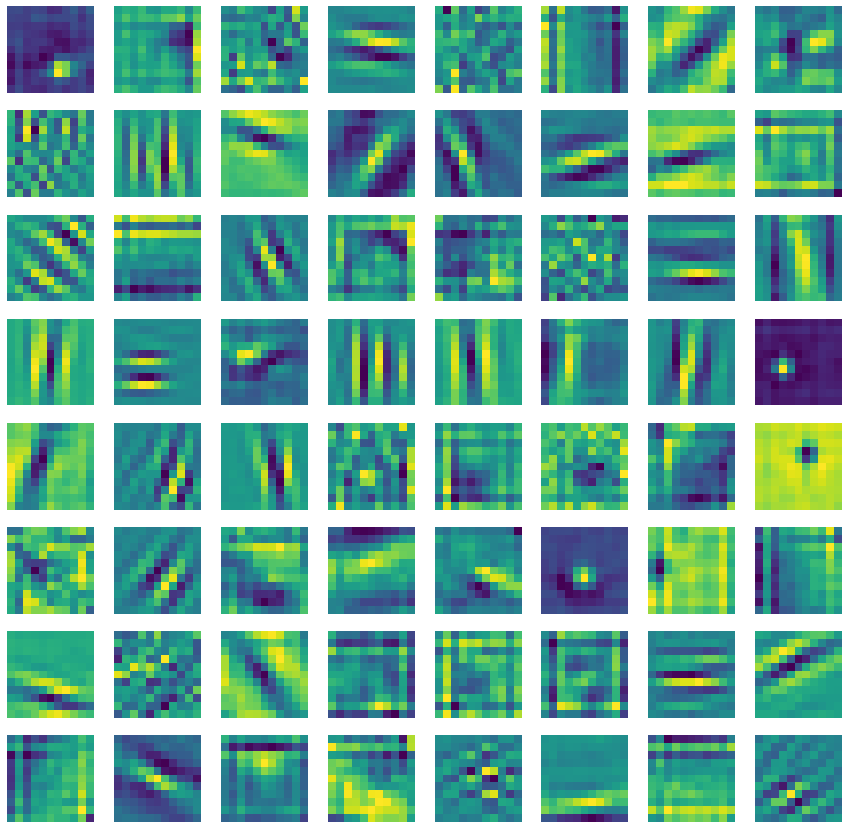

In [13]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20, 20)
fig_size = int(np.sqrt(len(filters_np)))
for i in range(fig_size * fig_size):
    fig.add_subplot(fig_size, fig_size, i+1)
    imgplot = plt.imshow(filters_np[i])
    plt.axis('off')